In [28]:
import os
import imgaug.augmenters as iaa
import imageio
import numpy as np

# Define the sequence of augmentations with additional filters
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # horizontal flips
    iaa.Crop(percent=(0, 0.1)),  # random crops
    iaa.GaussianBlur(sigma=(0.0, 1.0)),  # apply slight Gaussian blur for denoising
    iaa.AddToHueAndSaturation((-10, 10)),  # small changes to hue and saturation to maintain color clarity
    iaa.Multiply((0.9, 1.1)),  # slightly change brightness
    iaa.LinearContrast((0.8, 1.2)),  # adjust contrast within a small range to maintain image clarity
    iaa.MedianBlur(k=(1, 3))  # apply median blur for denoising
])


def augment_and_save_images(input_dir, output_dir):
    # Get the maximum number of images in any class
    max_images = 0
    for class_name in os.listdir(input_dir):
        class_dir = os.path.join(input_dir, class_name)
        if os.path.isdir(class_dir):
            num_images = len([name for name in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, name))])
            if num_images > max_images:
                max_images = num_images

    # Iterate over each class in the input directory
    for class_name in os.listdir(input_dir):
        class_dir = os.path.join(input_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        # Create the corresponding output directory
        output_class_dir = os.path.join(output_dir, class_name)
        os.makedirs(output_class_dir, exist_ok=True)

        # Get list of images in the class directory
        image_names = [name for name in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, name))]
        num_images = len(image_names)

        # Copy original images to the output directory
        for image_name in image_names:
            image_path = os.path.join(class_dir, image_name)
            output_image_path = os.path.join(output_class_dir, image_name)
            imageio.imwrite(output_image_path, imageio.imread(image_path))

        # Calculate the number of augmented images needed
        num_augmented_images_needed = max_images - num_images

        # Augment and save images to reach the max_images count
        for image_name in image_names:
            if num_augmented_images_needed <= 0:
                break
            image_path = os.path.join(class_dir, image_name)
            image = imageio.imread(image_path)
            num_augmentations = min(num_augmented_images_needed, max_images - num_images)
            images_aug = seq(images=[image for _ in range(num_augmentations)])

            # Save the augmented images
            for i, aug_image in enumerate(images_aug):
                if num_augmented_images_needed <= 0:
                    break
                aug_image_name = f"{os.path.splitext(image_name)[0]}_aug_{i+1}.jpg"
                aug_image_path = os.path.join(output_class_dir, aug_image_name)
                imageio.imwrite(aug_image_path, aug_image)
                num_augmented_images_needed -= 1

# Define the input and output directories
input_directory = r"C:\Users\ACER\Pca_model\Dataset\New folder"
output_directory = r"C:\Users\ACER\Pca_model\Dataset\augment"

# Perform augmentation and save images
augment_and_save_images(input_directory, output_directory)


C:\Users\ACER\AppData\Local\Temp\ipykernel_8312\2470599905.py:46: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imageio.imwrite(output_image_path, imageio.imread(image_path))
C:\Users\ACER\AppData\Local\Temp\ipykernel_8312\2470599905.py:56: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


ValueError: Could not find a backend to open `C:\Users\ACER\Pca_model\Dataset\New folder\Yellow Leaf Curl Virus\svn-r6Yb5c`` with iomode `ri`.

In [1]:
import os

dataset_dir = r"C:\Users\ACER\Pca_model\Dataset\augment"
contents = os.listdir(dataset_dir)
print(contents)


['Bacterial Spot', 'Early Blight', 'Healthy', 'Leaf Mold', 'Yellow Leaf Curl Virus']


In [2]:
def loadImages(data_dir):
  data = {}
  for c in ['Bacterial Spot', 'Early Blight', 'Healthy', 'Leaf Mold', 'Yellow Leaf Curl Virus']:
    data[c] = []
    if c == 'Bacterial Spot':
      label = 0
    elif c == 'Early Blight':
      label = 1
    elif c == 'Healthy':
      label = 2
    elif c == 'Leaf Mold':
      label = 3
    elif c == 'Yellow Leaf Curl Virus':
      label = 4   

    files = os.listdir(data_dir + '/' + c)
    files = files[0:3000] # Maximum number objects for each class

    print("A sample object from {} class:".format(c))
    plt.imshow(image.load_img(data_dir + '/' + c + '/' + files[4], target_size=(224, 224)))
    plt.show()

    for f_name in files:
      img_path = data_dir + '/' + c + '/' + f_name

      img = image.load_img(img_path, target_size=(224, 224))
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input(x)

      data[c].append([x, label])
  
  return data


In [3]:
import os
import numpy as np
from keras.utils import to_categorical
from keras.applications.densenet import DenseNet121
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input, decode_predictions
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


A sample object from Bacterial Spot class:


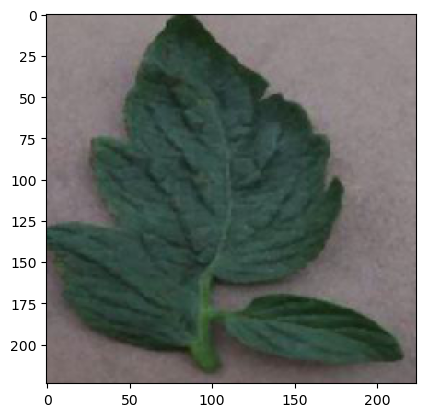

A sample object from Early Blight class:


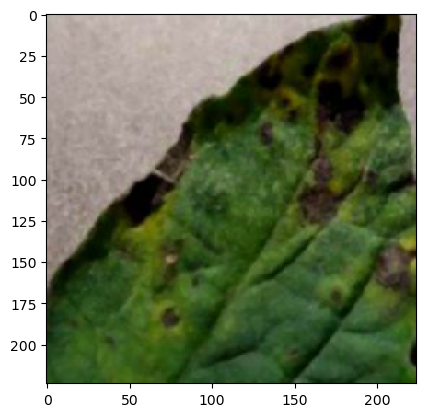

A sample object from Healthy class:


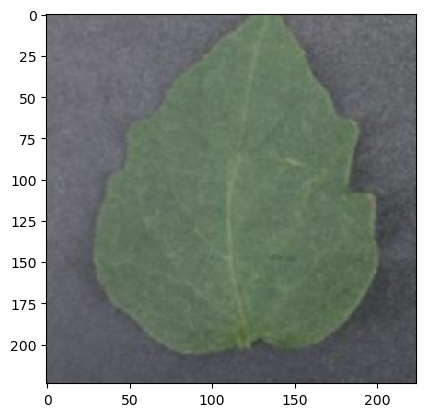

A sample object from Leaf Mold class:


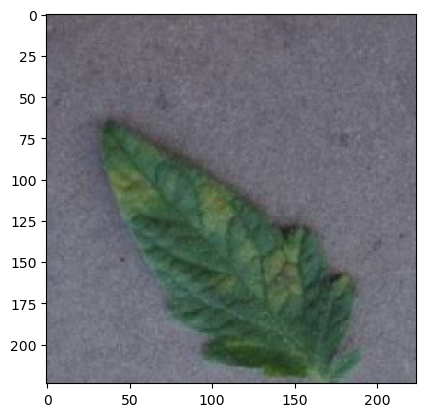

A sample object from Yellow Leaf Curl Virus class:


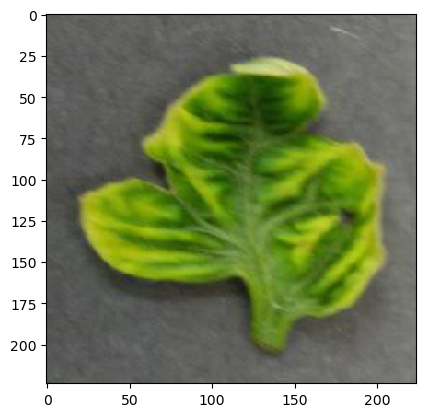

In [4]:
data = loadImages(dataset_dir)

In [5]:
train_classObj1, test_classObj1 = train_test_split(data['Bacterial Spot'], test_size = 0.25)
train_classObj2, test_classObj2 = train_test_split(data['Early Blight'], test_size = 0.25)
train_classObj3, test_classObj3 = train_test_split(data['Healthy'], test_size = 0.25)
train_classObj4, test_classObj4 = train_test_split(data['Leaf Mold'], test_size = 0.25)
train_classObj5, test_classObj5 = train_test_split(data['Yellow Leaf Curl Virus'], test_size = 0.25)

In [6]:
print("The number of TRAIN objects in each class: ", len(train_classObj1))
print("The number of TEST objects in each class: ", len(test_classObj1))

The number of TRAIN objects in each class:  2250
The number of TEST objects in each class:  750


In [7]:
train_objs = train_classObj1 + train_classObj2 + train_classObj3 + train_classObj4 + train_classObj5
test_objs = test_classObj1 + test_classObj2 + test_classObj3 + test_classObj4 + test_classObj5

In [8]:
train_data = [x[0] for x in train_objs]
train_label = [y[1] for y in train_objs]

test_data = [x[0] for x in test_objs]
test_label = [y[1] for y in test_objs]
     

In [9]:
X_train = np.array(train_data)
X_test = np.array(test_data)

In [10]:
train_data = np.squeeze(X_train)
train_label = np.array(train_label)

test_data = np.squeeze(X_test)
test_label = np.array(test_label)

In [11]:
print("Input dimension: ", train_data.shape)
print("Input dimension: ", test_label.shape)

Input dimension:  (11250, 224, 224, 3)
Input dimension:  (3750,)


In [12]:

# Assuming your original labels are in train_label and test_label
num_classes = 5  # Total number of classes in your dataset
train_label_one_hot = to_categorical(train_label, num_classes=num_classes)
test_label_one_hot = to_categorical(test_label, num_classes=num_classes)

# Print the shapes of the one-hot encoded labels
print("One-hot encoded training label dimension: ", train_label_one_hot.shape)
print("One-hot encoded test label dimension: ", test_label_one_hot.shape)

One-hot encoded training label dimension:  (11250, 5)
One-hot encoded test label dimension:  (3750, 5)


In [13]:
X_train_reshaped = X_train.reshape(-1, 224, 224)
X_test_reshaped = X_test.reshape(-1, 224, 224)
print("Reshaped dimension: ", X_train_reshaped.shape)
print("Reshaped dimension: ", X_test_reshaped.shape)

Reshaped dimension:  (33750, 224, 224)
Reshaped dimension:  (11250, 224, 224)


In [14]:
# Reshape each image into a 1D array
X_train_flat = X_train.reshape(train_data.shape[0], -1)

# Verify the new shape
print("New shape of X_train:", X_train_flat.shape)


New shape of X_train: (11250, 150528)


In [15]:
from sklearn.decomposition import PCA

# Apply PCA for feature extraction
pca = PCA(n_components=100)  # Reduce to 50 principal components
X_train_pca = pca.fit_transform(X_train_flat)

# Verify the shape of the transformed data
print("Shape of X_train_pca:", X_train_pca.shape)


Shape of X_train_pca: (11250, 100)


In [16]:
# Extract features using PCA
training_feature = X_train_pca

# Similarly for the test data
X_test_flat = X_test.reshape(test_data.shape[0], -1)
X_test_pca = pca.transform(X_test_flat)
test_feature = X_test_pca

In [17]:
training_feature = np.array(training_feature)
test_feature = np.array(test_feature)

In [18]:
print("Training feature dimension: ", training_feature.shape)
print("Test feature dimension: ", test_feature.shape)

Training feature dimension:  (11250, 100)
Test feature dimension:  (3750, 100)


In [19]:
from sklearn.decomposition import PCA

# Perform PCA for 2D representations
pca_2D = PCA(n_components=2)
training_feature_pca_2D = pca_2D.fit_transform(training_feature)
test_feature_pca_2D = pca_2D.fit_transform(test_feature)


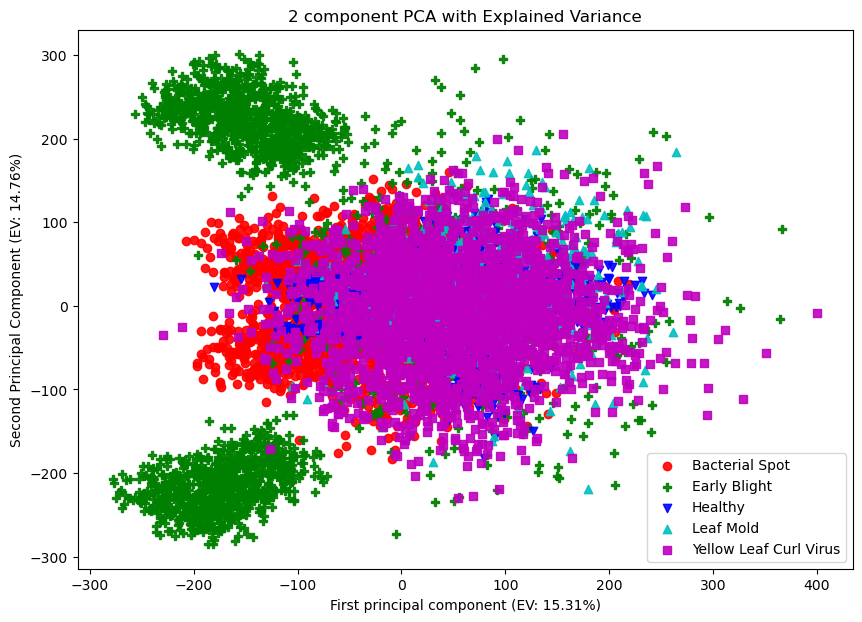

In [20]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown'] # You can extend this list with more colors if needed
markers = ['o', 'P', 'v', '^', 's', 'D', 'X', '*', 'h', '<'] # You can extend this list with more markers if needed
classes = np.sort(np.unique(train_label))
labels = ['Bacterial Spot', 'Early Blight', 'Healthy', 'Leaf Mold', 'Yellow Leaf Curl Virus']

for class_ix, marker, color, label in zip(classes, markers[:len(classes)], colors[:len(classes)], labels[:len(classes)]):
    class_indices = np.where(train_label == class_ix)
    ax.scatter(training_feature_pca_2D[class_indices, 0],
               training_feature_pca_2D[class_indices, 1],
               marker=marker, color=color,
               linewidth=1, alpha=0.9, label=label)
# Get explained variance from PCA
explained_variance = pca.explained_variance_ratio_

ax.legend(loc='best')  
plt.xlabel(f'First principal component (EV: {explained_variance[0]*100:.2f}%)')
plt.ylabel(f'Second Principal Component (EV: {explained_variance[1]*100:.2f}%)')
plt.title("2 component PCA with Explained Variance")
plt.show()


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Train a classifier (SVM used here as an example)
clf = SVC()
clf.fit(training_feature, train_label)

# Evaluate the model on the testing set
y_pred = clf.predict(test_feature)
accuracy = accuracy_score(test_label, y_pred)
print("Test Accuracy:{:.2f}".format(accuracy*100))

Test Accuracy:95.28


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

training_features = (training_feature - np.mean(training_feature, axis=0)) / np.std(training_feature, axis=0)
test_features = (test_feature - np.mean(test_feature, axis=0)) / np.std(test_feature, axis=0)

n_components = 100 
# Build an enhanced neural network to use PCA features
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(n_components,), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# Compile the model with a lower learning rate and use a learning rate scheduler
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(training_features, train_label_one_hot, epochs=100, batch_size=64, validation_data=(test_features, test_label_one_hot), callbacks=[reduce_lr])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_features, test_label_one_hot)
print("Test Accuracy with Enhanced Dense Neural Network and PCA:", test_acc)

Epoch 1/100
176/176 [==============================] - 5s 17ms/step - loss: 2.9684 - accuracy: 0.2476 - val_loss: 2.7144 - val_accuracy: 0.4184 - lr: 0.0010
Epoch 2/100
176/176 [==============================] - 3s 16ms/step - loss: 2.3425 - accuracy: 0.4158 - val_loss: 1.7869 - val_accuracy: 0.7405 - lr: 0.0010
Epoch 3/100
176/176 [==============================] - 4s 23ms/step - loss: 1.6163 - accuracy: 0.7189 - val_loss: 1.2510 - val_accuracy: 0.8488 - lr: 0.0010
Epoch 4/100
176/176 [==============================] - 4s 20ms/step - loss: 1.2010 - accuracy: 0.8351 - val_loss: 0.9502 - val_accuracy: 0.8811 - lr: 0.0010
Epoch 5/100
176/176 [==============================] - 4s 21ms/step - loss: 0.9972 - accuracy: 0.8726 - val_loss: 0.8648 - val_accuracy: 0.8960 - lr: 0.0010
Epoch 6/100
176/176 [==============================] - 4s 20ms/step - loss: 0.8895 - accuracy: 0.8880 - val_loss: 0.8050 - val_accuracy: 0.9003 - lr: 0.0010
Epoch 7/100
176/176 [==============================] - 3s 

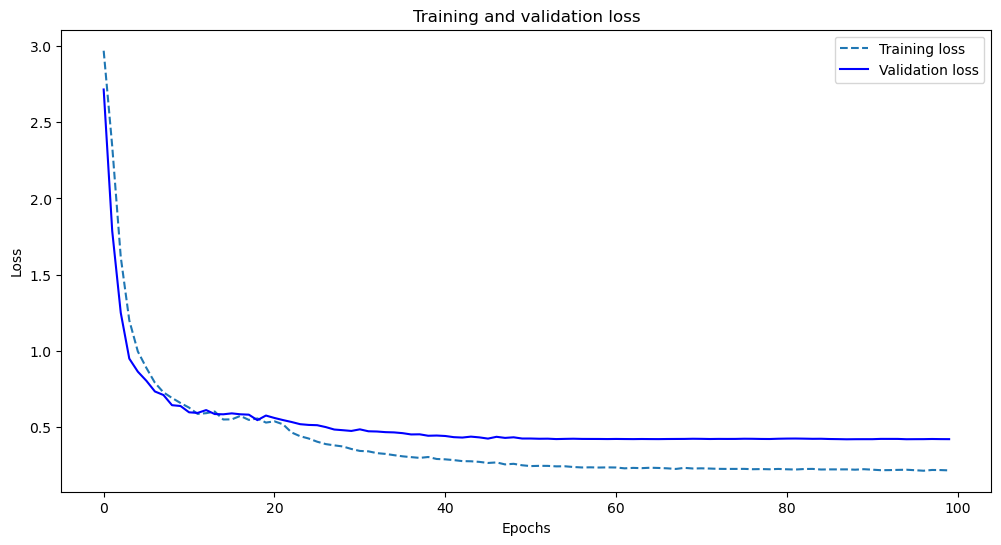

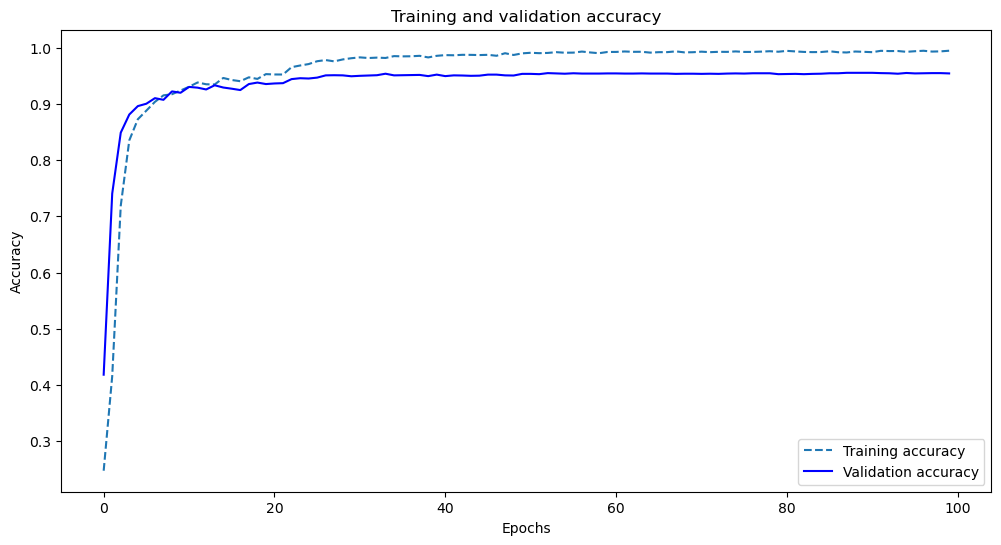

In [23]:
# Retrieve metrics
acc = history.history['accuracy']         # Correct key for training accuracy
val_acc = history.history['val_accuracy'] # Correct key for validation accuracy
loss = history.history['loss']            # Correct key for training loss
val_loss = history.history['val_loss']    # Correct key for validation loss

epochs = range(len(acc))

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, '--', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, '--', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


118/118 [==============================] - 1s 4ms/step


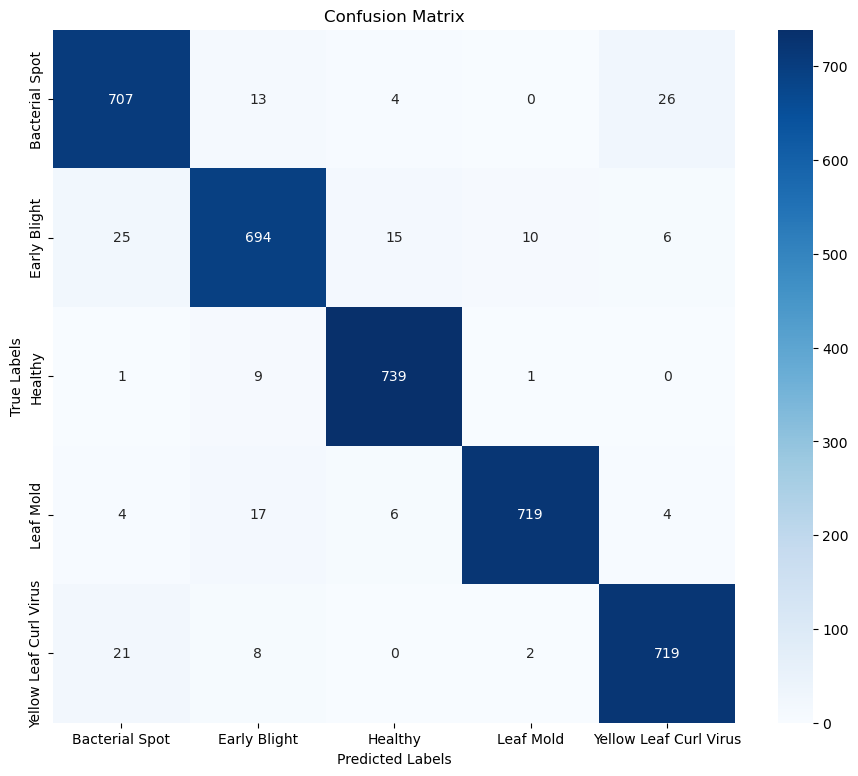

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the labels for the test set  # Ensure test_feature is the correct variable
y_pred_prob = model.predict(test_features)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert test_label from one-hot encoding to class labels
y_true = np.argmax(test_label_one_hot, axis=1)

# Class names
class_names = ['Bacterial Spot', 'Early Blight', 'Healthy', 'Leaf Mold', 'Yellow Leaf Curl Virus']

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(11, 9))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, vmin=0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [25]:
model.summary()# Assuming your model has a convolutional layer named 'conv1'
# Accessing the first dense layer
dense_layer = model.get_layer('dense')

# Get details of the dense layer
print("Output Shape:", dense_layer.output_shape)
print("Number of Parameters:", dense_layer.count_params())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              103424    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
from tabulate import tabulate

# Compute precision, recall, and F1 score for each class
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)

# Compute overall training accuracy and testing accuracy
train_acc = history.history['accuracy'][-1]
test_acc = test_acc  # already computed from model.evaluate

# Class names
class_names = ['Bacterial Spot', 'Early Blight', 'Healthy', 'Leaf Mold', 'Yellow Leaf Curl Virus']

# Create a DataFrame to display results
metrics_table = pd.DataFrame({
    'Class': class_names,
    'Training Accuracy': [train_acc] * len(class_names),  # Same value for all classes
    'Testing Accuracy': [test_acc] * len(class_names),    # Same value for all classes
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Print the DataFrame using tabulate for better formatting
print("\nModel Performance Metrics")
print(tabulate(metrics_table, headers='keys', tablefmt='pretty', showindex=False))



Model Performance Metrics
+------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|         Class          | Training Accuracy  |  Testing Accuracy  |     Precision      |       Recall       |      F1 Score      |
+------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|     Bacterial Spot     | 0.9944888949394226 | 0.9541333317756653 | 0.9327176781002638 | 0.9426666666666667 | 0.9376657824933687 |
|      Early Blight      | 0.9944888949394226 | 0.9541333317756653 | 0.9365721997300944 | 0.9253333333333333 | 0.9309188464118041 |
|        Healthy         | 0.9944888949394226 | 0.9541333317756653 | 0.9672774869109948 | 0.9853333333333333 | 0.976221928665786  |
|       Leaf Mold        | 0.9944888949394226 | 0.9541333317756653 |  0.98224043715847  | 0.9586666666666667 | 0.970310391363023  |
| Yellow Leaf Curl Virus | 0.9944888949394226 | 0